In [1]:
!git clone https://github.com/theschoolofai/YoloV3.git

Cloning into 'YoloV3'...
remote: Enumerating objects: 156, done.
remote: Total 156 (delta 0), reused 0 (delta 0), pack-reused 156
Receiving objects: 100% (156/156), 12.74 MiB | 14.04 MiB/s, done.
Resolving deltas: 100% (7/7), done.


In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/My\ Drive/YoloV3/

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
/content/gdrive/My Drive/YoloV3


In [2]:
import time
import glob
import torch
import os

from IPython.display import Image, clear_output 
print('PyTorch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

PyTorch 1.4.0 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15079MB, multi_processor_count=40)


In [3]:
ls

 annotation_tool/   output/        runs/             'ubdivisions=1'
 cfg/               __pycache__/   test_batch0.png    utils/
 data/              README.md      test.py            vim.exe.stackdump
 detect.py          results.json   ting               weights/
 models.py          results.png    train_batch0.png
 out_out/           results.txt    train.py


In [4]:
!python train.py --data data/smalcoco/smalcoco.data --batch 3 --cache --epochs 3 --nosave

Namespace(accumulate=4, adam=False, batch_size=3, bucket='', cache_images=True, cfg='cfg/yolov3-spp.cfg', data='data/smalcoco/smalcoco.data', device='', epochs=3, evolve=False, img_size=[512], multi_scale=False, name='', nosave=True, notest=False, rect=False, resume=False, single_cls=False, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)

2020-04-23 13:46:03.444605: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
Model Summary: 225 layers, 6.29987e+07 parameters, 6.29987e+07 gradients
Caching labels (20 found, 0 missing, 0 empty, 0 duplicate, for 20 images): 100% 20/20 [00:08<00:00,  2.43it/s]
Caching images (0.0GB): 100% 20/20 [00:08<00:00,  2.29it/s]
Caching labels (20 found, 0 missing, 0 empty, 0 duplicate, for 20 images): 100% 20/20 [00:00<00:00, 1054.34it/s]
C

In [5]:
!python train.py --data data/customdata2/custom.data --batch 10 --cache --cfg cfg/yolov3-custom.cfg --epochs 300 --nosave

Namespace(accumulate=4, adam=False, batch_size=10, bucket='', cache_images=True, cfg='cfg/yolov3-custom.cfg', data='data/customdata2/custom.data', device='', epochs=300, evolve=False, img_size=[512], multi_scale=False, name='', nosave=True, notest=False, rect=False, resume=False, single_cls=False, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)

2020-04-23 13:47:14.804922: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
Model Summary: 225 layers, 6.25733e+07 parameters, 6.25733e+07 gradients
Caching labels (459 found, 0 missing, 0 empty, 0 duplicate, for 459 images): 100% 459/459 [05:08<00:00,  1.49it/s]
Caching images (0.4GB): 100% 459/459 [04:16<00:00,  1.79it/s]
Caching labels (459 found, 0 missing, 0 empty, 0 duplicate, for 459 images): 100% 459/459 [00:00<00:0

In [10]:
!python detect.py --conf-thres 0.1 --output "/content/gdrive/My Drive/YoloV3/out_video" --source "/content/gdrive/My Drive/YoloV3/in_video/minionbulb.mp4"

Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3-custom.cfg', classes=None, conf_thres=0.1, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='data/customdata/custom.names', output='/content/gdrive/My Drive/YoloV3/out_video', save_txt=False, source='/content/gdrive/My Drive/YoloV3/in_video/minionbulb.mp4', view_img=False, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)

Model Summary: 225 layers, 6.25733e+07 parameters, 6.25733e+07 gradients
video 1/1 (1/1195) /content/gdrive/My Drive/YoloV3/in_video/minionbulb.mp4: 320x512 1 Minions, Done. (0.034s)
video 1/1 (2/1195) /content/gdrive/My Drive/YoloV3/in_video/minionbulb.mp4: 320x512 1 Minions, Done. (0.033s)
video 1/1 (3/1195) /content/gdrive/My Drive/YoloV3/in_video/minionbulb.mp4: 320x512 1 Minions, Done. (0.033s)
video 1/1 (4/1195) /content/gdrive/My Drive/YoloV3/in_video/minionbulb.mp4: 320x512 1 Minions, Done. (0.033s)
video 1/1 (5/1195) /

In [12]:
!python detect.py --conf-thres 0.1 --output out_out --source "/content/gdrive/My Drive/YoloV3/data/test"

Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3-custom.cfg', classes=None, conf_thres=0.1, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='data/customdata/custom.names', output='out_out', save_txt=False, source='/content/gdrive/My Drive/YoloV3/data/test', view_img=False, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)

Model Summary: 225 layers, 6.25733e+07 parameters, 6.25733e+07 gradients
image 1/50 /content/gdrive/My Drive/YoloV3/data/test/minion_107.jpg: 512x512 1 Minions, Done. (0.046s)
image 2/50 /content/gdrive/My Drive/YoloV3/data/test/minion_117.jpg: 512x512 1 Minions, Done. (0.046s)
image 3/50 /content/gdrive/My Drive/YoloV3/data/test/minion_127.jpg: 512x512 1 Minions, Done. (0.046s)
image 4/50 /content/gdrive/My Drive/YoloV3/data/test/minion_136.jpg: 512x512 1 Minions, Done. (0.046s)
image 5/50 /content/gdrive/My Drive/YoloV3/data/test/minion_145.jpg: 512x512 2 Minions, Done. (0

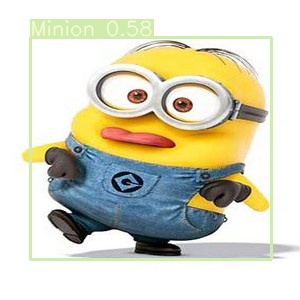

In [15]:
Image(filename='out_out/minion_52.jpg', width=300)

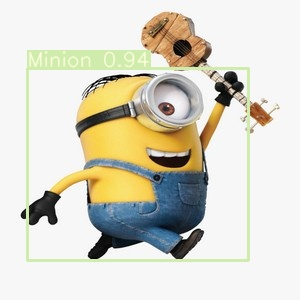

In [17]:
Image(filename='out_out/minion_62.jpg', width=300)

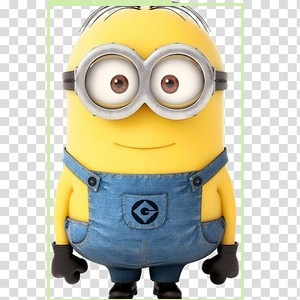

In [19]:
Image(filename='out_out/minion_71.jpg', width=300)

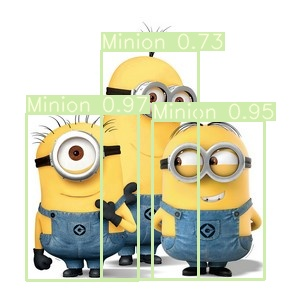

In [21]:
Image(filename='out_out/minion_80.jpg', width=300)